In [1]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt

UsageError: unrecognized arguments: # jupyter "magic" to display plots in notebook


In [2]:
url = 'http://www2.census.gov/geo/tiger/TIGER2019/CBSA/tl_2019_us_cbsa.zip'
local_path = 'tmp/'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['tl_2019_us_cbsa.dbf', 'tl_2019_us_cbsa.prj', 'tl_2019_us_cbsa.shp', 'tl_2019_us_cbsa.shx']


In [4]:
dbf, prj, shp, shx = [filename for filename in filenames]
usa = gpd.read_file(local_path + shp)
print("Shape of the dataframe: {}".format(usa.shape))
print("Projection of dataframe: {}".format(usa.crs))
usa.head()

Shape of the dataframe: (938, 13)
Projection of dataframe: epsg:4269


,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,122,12020,12020,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",M1,1,G3110,2654601832,26140309,+33.9439840,-083.2138965,"POLYGON ((-83.53739 33.96591, -83.53184 33.968..."
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22494938651,387716575,+33.6937280,-084.3999113,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438776649,301268696,+39.4693555,-074.6337591,"POLYGON ((-74.85675 39.42076, -74.85670 39.420..."
3,426,12120,12120,"Atmore, AL","Atmore, AL Micro Area",M2,2,G3110,2448115116,20504948,+31.1222867,-087.1684097,"POLYGON ((-87.61542 31.04100, -87.61541 31.041..."
4,258,12140,12140,"Auburn, IN","Auburn, IN Micro Area",M2,2,G3110,939731962,2657419,+41.4011894,-085.0001854,"POLYGON ((-85.19295 41.38001, -85.19296 41.381..."


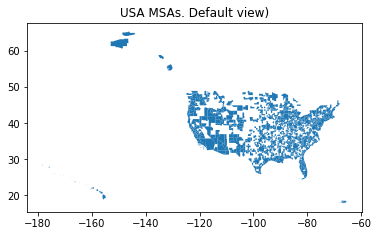

In [8]:
ax = usa.plot()
ax.set_title("USA MSAs. Default view)");

In [13]:
# map the qualifying employment communities

import pandas as pd

qualifying_employment_areas = pd.read_csv('/Users/mariacastillo-coding/Documents/Github/rmi-energy-communities/notebooks/files/qualifying_employment_areas.csv',dtype={'geoid':'str'})

In [16]:
qualifying_employment_areas = qualifying_employment_areas.rename(columns={'geoid':'GEOID'})

In [18]:
usa = usa.loc[usa['GEOID'].isin(qualifying_employment_areas['GEOID'])]

In [21]:
usa

,CSAFP,CBSAFP,GEOID,NAME,NAMELSAD,LSAD,MEMI,MTFCC,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1,122,12060,12060,"Atlanta-Sandy Springs-Alpharetta, GA","Atlanta-Sandy Springs-Alpharetta, GA Metro Area",M1,1,G3110,22494938651,387716575,+33.6937280,-084.3999113,"POLYGON ((-85.33823 33.65312, -85.33842 33.654..."
2,428,12100,12100,"Atlantic City-Hammonton, NJ","Atlantic City-Hammonton, NJ Metro Area",M1,1,G3110,1438776649,301268696,+39.4693555,-074.6337591,"POLYGON ((-74.85675 39.42076, -74.85670 39.420..."
7,None,12260,12260,"Augusta-Richmond County, GA-SC","Augusta-Richmond County, GA-SC Metro Area",M1,1,G3110,9015028913,262514053,+33.4603713,-081.9828327,"POLYGON ((-82.21865 33.68630, -82.21856 33.686..."
10,None,12420,12420,"Austin-Round Rock-Georgetown, TX","Austin-Round Rock-Georgetown, TX Metro Area",M1,1,G3110,10935038512,150326847,+30.2395128,-097.6912697,"POLYGON ((-98.04989 30.62415, -98.04954 30.624..."
12,None,12540,12540,"Bakersfield, CA","Bakersfield, CA Metro Area",M1,1,G3110,21062540828,78680980,+35.3466288,-118.7295064,"POLYGON ((-119.91366 35.43926, -119.92327 35.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,None,48540,48540,"Wheeling, WV-OH","Wheeling, WV-OH Metro Area",M1,1,G3110,2443361485,49381782,+39.9755090,-080.8470113,"POLYGON ((-80.70275 40.15725, -80.70215 40.157..."
924,556,48620,48620,"Wichita, KS","Wichita, KS Metro Area",M1,1,G3110,10743282133,86299802,+37.6378960,-097.2462875,"POLYGON ((-97.70197 37.91132, -97.70193 37.912..."
925,None,48660,48660,"Wichita Falls, TX","Wichita Falls, TX Metro Area",M1,1,G3110,6784838328,143920414,+33.7761441,-098.5019073,"POLYGON ((-98.95320 33.83402, -98.95320 33.838..."
926,558,48700,48700,"Williamsport, PA","Williamsport, PA Metro Area",M1,1,G3110,3182485518,39032440,+41.3438824,-077.0552624,"POLYGON ((-77.42693 41.27734, -77.42734 41.278..."


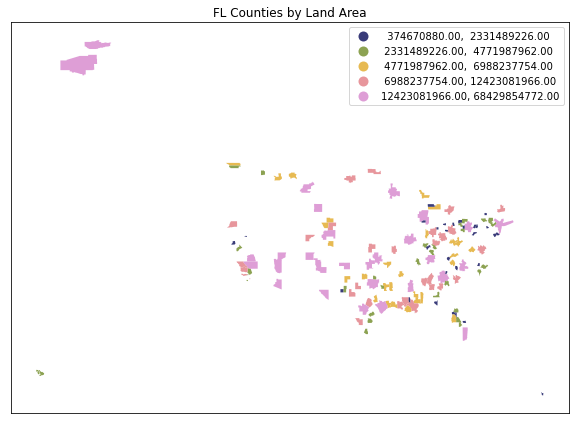

In [23]:
ax = usa.plot(figsize=(10,10), column='ALAND', cmap="tab20b", scheme='quantiles', legend=True)
ax.set(xticks=[], yticks=[]) #removes axes
ax.set_title("FL Counties by Land Area", fontsize='large')
#add the legend and specify its location
#leg = ax.get_legend()
#leg.set_bbox_to_anchor((0.5,0.3))
plt.savefig("FL_Counties.png", bbox_inches='tight')